## Creating a graph from text data

### Loading the text data

In [4]:
import pandas as pd
import itertools

In [5]:
graph_data_path = '/home/benjamin/Documents/memetracker/Data/graph/'
pickle_data_path = '/home/benjamin/Documents/memetracker/Data/pickle/'
series_name = 'baron_noir'
pickle_file = pickle_data_path+series_name+'_texts'+'.pkl'
vocab_file = pickle_data_path+series_name+'_vocab_bow'+'.pkl'
tfidf_file = pickle_data_path+series_name+'_vocab_tfidf'+'.pkl'

In [76]:
text_data = pd.read_pickle(pickle_file)
vocab_data = pd.read_pickle(vocab_file)
tfidf_data = pd.read_pickle(tfidf_file)

In [77]:
# create the set of most used words
nb_words = 200
word_set = set(tfidf_data.words[0:nb_words])

###  Selecting documents with particular keywords

In [78]:
candidat_meme = "baron politique colère noire" # Un baron de la politique dans une colère noire
candidat_meme = "Baron Noir bleu" #- "Quand le Baron Noir se met au bleu, ça ne passe pas dans l’hémicycle ..."
#candidat_meme =  "Baron Rose"#- "Quoi, vous ne connaissez pas le Baron Rose ?"
candidat_meme = "député"#- "Le député qui murmurait à l'oreille des lycéens."
selected_Keywords = set(candidat_meme.split())
data_subset = []
for text in text_data.text:
    if len(set(str(text).split())&selected_Keywords)>=(len(selected_Keywords)):
        data_subset.append(text)

In [79]:
len(selected_Keywords)

1

In [80]:
len(data_subset)

420

### Creating the graph

In [81]:
import networkx as nx
import matplotlib.pyplot as plt

In [82]:
G = nx.Graph()

In [83]:
# Add the nodes
G.add_nodes_from(word_set)

In [84]:
# Connect the nodes if they appear in the same text
# the weight is proportional to the number of co-occurences
for text in data_subset:
    common_words = set(str(text).split())&word_set
    edge_list = list(itertools.combinations(common_words, 2))
    #G.add_edges_from(edge_list)
    for edge in edge_list:
        if G.has_edge(edge[0],edge[1]):
            # we added this one before, just increase the weight by one
            G[edge[0]][edge[1]]['weight'] += 1
        else:
            # new edge. add with weight=1
            G.add_edge(edge[0], edge[1], weight=1)

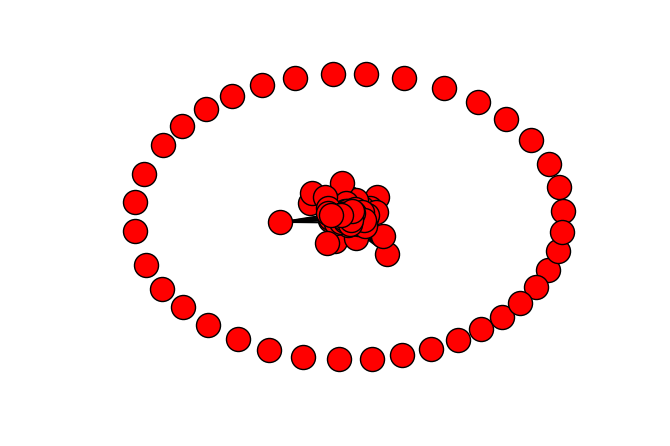

In [85]:
nx.draw_spring(G)
plt.show()

### Community detection

In [86]:
import community

In [87]:
#first compute the best partition
clusterDic = community.best_partition(G)

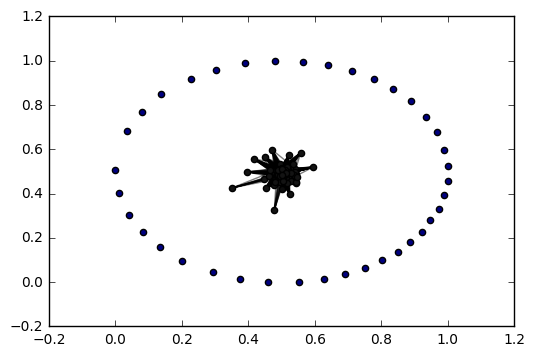

In [88]:
#drawing
partition = clusterDic
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

In [89]:
nx.set_node_attributes(G,'cluster',clusterDic)

### Thresholding the edges

In [90]:
# Extracting the edge information
#sum_weight = 0
#n_edges = 0
#for u,v,a in G.edges(data=True):
#    sum_weight+=a['weight']
#    n_edges+=1
#average_weight = sum_weight*1.0/n_edges

In [91]:
# Node properties: degree and centrality
degreeDic = G.degree(weight='weight')
nx.set_node_attributes(G,'degree',degreeDic)
bcDic = nx.betweenness_centrality(G)
nx.set_node_attributes(G,'bCentrality',bcDic)

In [92]:
# Rescaling edge weights
n1,n2,weights = zip(*G.edges(data='weight'))
edges_id=list(zip(n1,n2))

In [93]:
import numpy as np
print('mean weight: '+str(np.mean(weights))+', max weight: '+str(np.max(weights)))

mean weight: 25.4574766778, max weight: 270


In [94]:
weights_n=weights/np.max(weights)
weights_n_dic=dict(zip(edges_id,weights_n)) 
nx.set_edge_attributes(G,'weight',weights_n_dic)

In [95]:
#nx.edge_betweenness_centrality(G, normalized=False)

In [97]:
# Sparsify the graph if the weight are too small
average_weight = np.mean(weights)/np.max(weights)
for u,v,a in G.edges(data=True):
    if a['weight']<average_weight*5:
        G.remove_edge(u,v)

In [98]:
# Write the graph to a json file
from networkx.readwrite import json_graph
datag = json_graph.node_link_data(G)
import json
s = json.dumps(datag)
datag['links'] = [
        {
            'source': datag['nodes'][link['source']]['id'],
            'target': datag['nodes'][link['target']]['id'],
            'weight': link['weight']
        }
        for link in datag['links']]
s = json.dumps(datag)
with open("viz/graph.json", "w") as f:
    f.write(s)

In [ ]:
s

In [ ]:
G.edges(data='weight')

In [26]:
clusterDic

{'2016': 1,
 '20h55': 1,
 'ans': 2,
 'après': 2,
 'arestrup': 1,
 'aussi': 2,
 'avant': 2,
 'baron': 3,
 'baronnoir': 2,
 'bien': 2,
 'bon': 2,
 'bonne': 2,
 'bravo': 3,
 'canal': 3,
 'canalplus': 3,
 'cards': 3,
 'casting': 1,
 'chance': 0,
 'coffret': 0,
 'coffrets': 0,
 'comme': 2,
 'contre': 2,
 'création': 1,
 'demain': 1,
 'demande': 2,
 'deux': 2,
 'diffusée': 0,
 'dit': 2,
 'donc': 2,
 'dray': 3,
 'dunkerque': 3,
 'dvd': 3,
 'déjà': 2,
 'ebenzekri': 3,
 'encore': 2,
 'entre': 2,
 'faire': 2,
 'fait': 2,
 'fiction': 1,
 'follow': 1,
 'france': 3,
 'français': 1,
 'française': 1,
 'françois': 7,
 'février': 1,
 'gagner': 0,
 'hollande': 2,
 'house': 3,
 'houseofcards': 6,
 'ils': 2,
 'jeu': 2,
 'jeudi': 0,
 'julien': 3,
 'kad': 3,
 'kadmerad': 4,
 'loi': 2,
 'lundi': 1,
 'mal': 2,
 'marseille': 3,
 'merad': 3,
 'merci': 2,
 'mis': 0,
 'niels': 1,
 'noir': 3,
 'nouvelle': 1,
 'originale': 1,
 'paris': 3,
 'plus': 2,
 'politique': 1,
 'politiques': 2,
 'première': 1,
 'président': 